**Import Library**

In [1]:
import numpy as np  # Import library numpy untuk manipulasi array
import matplotlib.pyplot as plt  # Import library matplotlib untuk visualisasi gambar
%matplotlib inline  
# Digunakan untuk menampilkan gambar secara inline di notebook
import cv2  # Import library OpenCV untuk operasi gambar
import matplotlib.image as mpimg  # Modul untuk membaca dan menampilkan gambar
from skimage import data  # Modul skimage untuk mengakses contoh gambar

membaca gambar

In [27]:
# mengisi variabel image dengan data gambar "cell"
image = data.cell()

penerapan histogram equalization

In [28]:
# Menggunakan fungsi equalizeHist dari OpenCV untuk melakukan ekualisasi histogram pada gamba
image_equalized = cv2.equalizeHist(image)

Penerapan Metode Contrast Limited Adaptive Histogram Equalization (CLAHE)


In [29]:
# cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8)): Membuat objek CLAHE dengan parameter clipLimit sebesar 2 dan tileGridSize sebesar (8,8). Objek CLAHE ini 
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))

#mengaplikasikan CLAHE pada gambar original
image_clahe = clahe.apply(image)

Penerapan metode Contrast Stretching (CS)

In [30]:
# membuat array kosong untuk menyimpan output akhir
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')

# mengaplikasikan Min-Max Contrasting
min = np.min(image)
max = np.max(image)

# Melakukan normalisasi Min-Max Contrasting
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        # Rumus Min-Max Contrasting untuk mengubah nilai piksel menjadi rentang 0-255
        image_cs[i, j] = 255 * (image[i, j] - min) / (max - min)

Penerapan Metode Perkalian Konstanta

In [31]:
# Membuat salinan citra dengan tipe data float
copyCamera = image.copy().astype(float)

# Mendapatkan dimensi citra
m1, n1 = copyCamera.shape

# Membuat array kosong untuk menyimpan output akhir
output1 = np.empty([m1, n1])

# Iterasi melalui setiap piksel dalam citra
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        # Mendapatkan koordinat piksel
        a1 = baris
        b1 = kolom
        
        # Menyalin nilai piksel asli ke output
        output1[a1, b1] = copyCamera[baris, kolom]

Plot Image

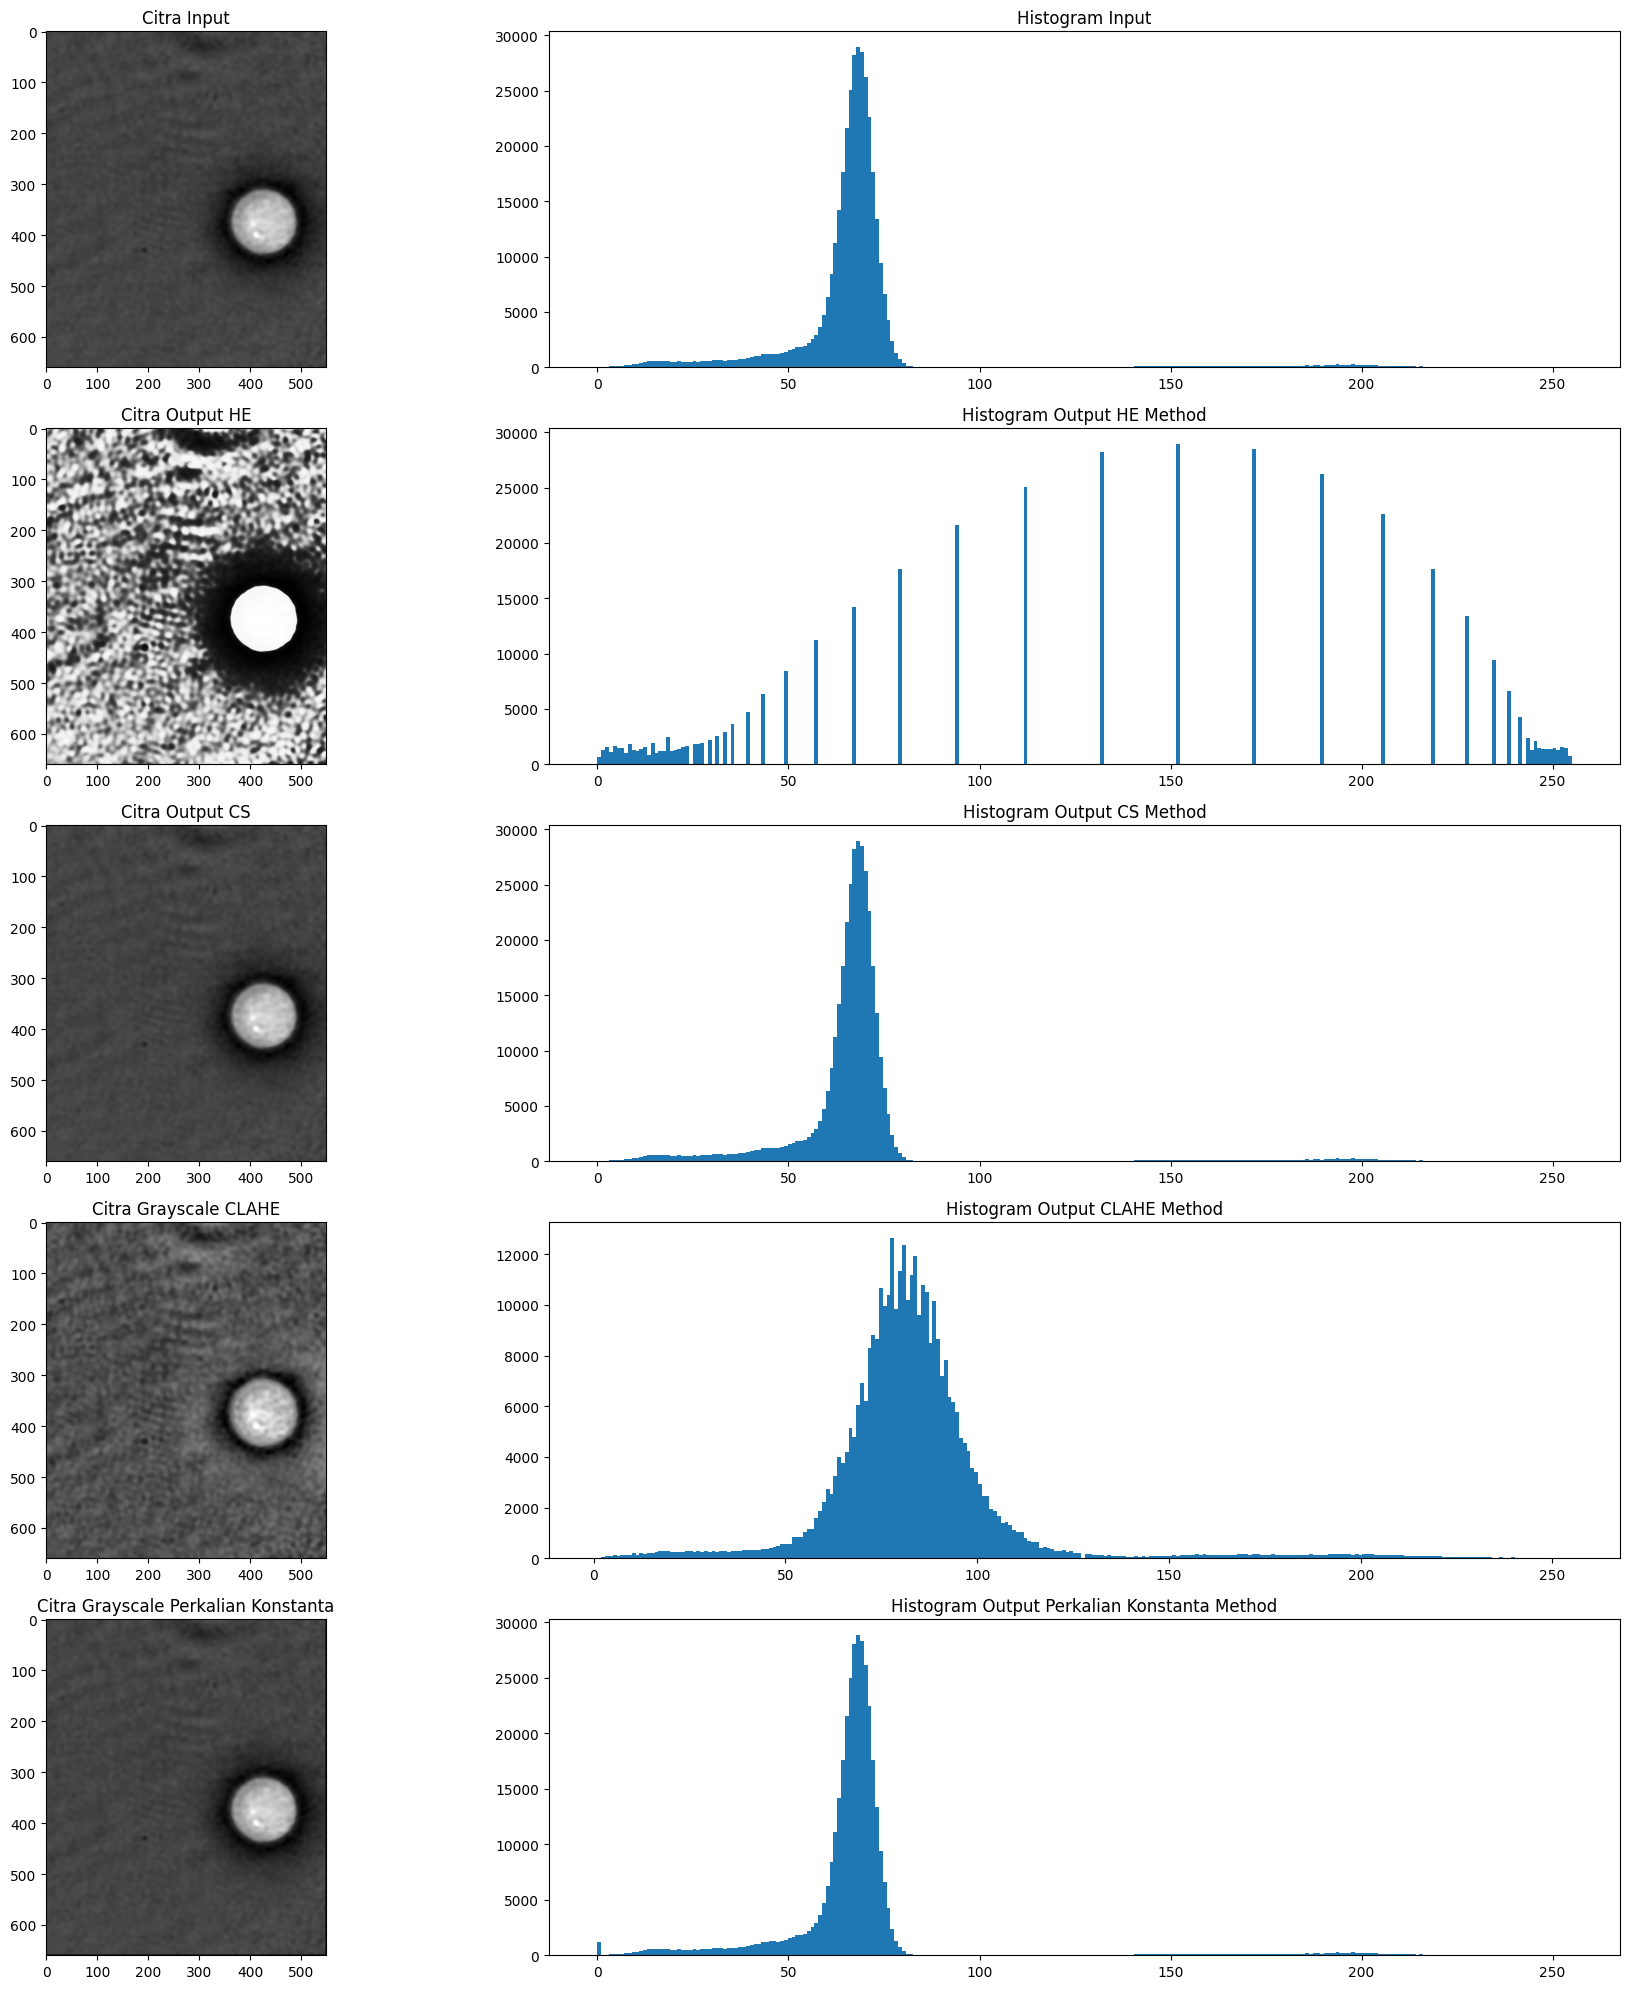

In [32]:
# Membuat subplots dengan ukuran 5 baris dan 2 kolom dalam sebuah figure
# dengan ukuran 20x20.
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()
# Menampilkan citra input pada subplot pertama, memberikan judul "Citra Input",
# dan menampilkan histogram citra input pada subplot kedua.
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")
ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram Input')
# Menampilkan citra hasil equalisasi histogram pada subplot ketiga, memberikan judul
# "Citra Output HE", dan menampilkan histogram citra hasil equalisasi histogram pada subplot keempat.
ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')
# Menampilkan citra hasil contrast stretching pada subplot kelima, memberikan
# judul "Citra Output CS", dan menampilkan histogram citra hasil contrast stretching pada subplot keenam.
ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')
# Menampilkan citra hasil CLAHE (Contrast Limited Adaptive Histogram Equalization) pada subplot ketujuh, memberikan judul "Citra Grayscale CLAHE", 
# dan menampilkan histogram citra hasil CLAHE pada subplot kedelapan.
ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')
# Menampilkan citra hasil perkalian konstanta pada subplot kesembilan, memberikan judul "Citra Grayscale Perkalian Konstanta", dan menampilkan histogram
# citra hasil perkalian konstanta pada subplot kesepuluh.
ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')
# Mengatur tata letak subplot
fig.tight_layout()